# Final Project Data Visualizations

STAT 451: Machine Learning (Fall 2021)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)   

---



This notebook is used to display various data visualizations for our dataset


In [80]:
%load_ext watermark
%watermark  -d -u -a 'William Ryan' -v -p numpy,matplotlib,pandas,seaborn,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: William Ryan

Last updated: 2021-12-05

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

numpy     : 1.20.3
matplotlib: 3.4.3
pandas    : 1.3.3
seaborn   : 0.11.2
sklearn   : 1.0



In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [57]:
data_path = '../data/Data/features_3_sec.csv'
df = pd.read_csv(data_path)
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [58]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.label)
df2 = df.copy()
df2['label'] = le.transform(df.label)
df2['label']

0       0
1       0
2       0
3       0
4       0
       ..
9985    9
9986    9
9987    9
9988    9
9989    9
Name: label, Length: 9990, dtype: int64

In [59]:
y = df2['label'].values
X = df2.iloc[:, 1:-1].values

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     train_size=0.7,
                     stratify=y,
                     random_state=0)

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
rf_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {rf_score*100:0.3f}%")

Train Accuracy: 99.914%
Test Accuracy: 86.520%


In [62]:
importance = clf.feature_importances_

names = df.columns[1:-1]

m = dict(zip(names, importance))
m = dict(sorted(m.items(), key=lambda item: item[1]))
m

{'length': 0.0,
 'mfcc14_var': 0.007576845645938083,
 'mfcc15_var': 0.007832135606204367,
 'mfcc16_var': 0.008219664885338082,
 'mfcc17_var': 0.008508967315293074,
 'mfcc18_var': 0.008763582638012229,
 'mfcc13_var': 0.00897341802920154,
 'mfcc12_var': 0.009223977662723336,
 'mfcc11_var': 0.009251274695419462,
 'mfcc19_mean': 0.009589124938547746,
 'mfcc9_var': 0.01017085978035847,
 'mfcc2_var': 0.010401129776067781,
 'mfcc19_var': 0.010504952803767724,
 'mfcc16_mean': 0.010627682147971728,
 'mfcc20_var': 0.010917930711754254,
 'mfcc18_mean': 0.011110863889907927,
 'mfcc20_mean': 0.01115159469806757,
 'tempo': 0.011249975620371356,
 'mfcc10_var': 0.011531728799057063,
 'mfcc14_mean': 0.011668607275515339,
 'mfcc8_var': 0.012400755811626923,
 'mfcc10_mean': 0.012526441023631789,
 'zero_crossing_rate_var': 0.012659509191394337,
 'mfcc15_mean': 0.01299556693881934,
 'mfcc5_mean': 0.01387846844885726,
 'mfcc17_mean': 0.013942061023346965,
 'spectral_bandwidth_var': 0.014242739468444319,
 'm

Text(0, 0.5, 'BPM')

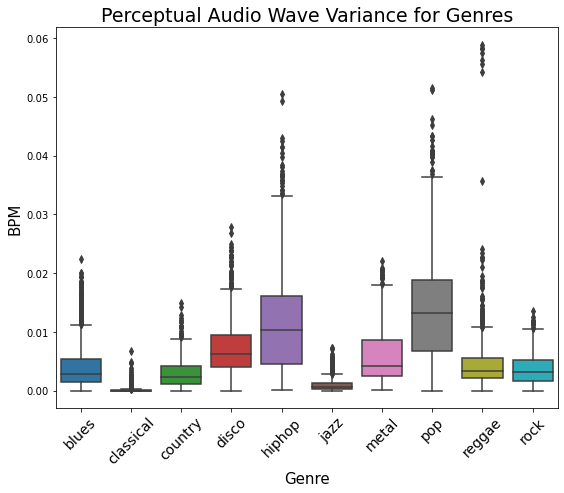

In [66]:
most_imp = df[['perceptr_var', 'label']]
fig, ax = plt.subplots(figsize=(9, 7))
sns.boxplot(data = most_imp, x = 'label', y = 'perceptr_var')

plt.title('Perceptual Audio Wave Variance for Genres', fontsize = 19)
plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
#plt.savefig("BPM Boxplot.jpg")

In [94]:
y = df['label']
X = df.iloc[:, 1:-1]

columns = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = columns)

pca = PCA(n_components=2)
pca_comps = pca.fit_transform(X)

vis_df = pd.DataFrame(data = pca_comps, columns = ['Principle Component 1', 'Principle Component 2'])
vis_df = pd.concat([vis_df, y], axis = 1)
pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

Text(0, 0.5, 'Principle Component 2')

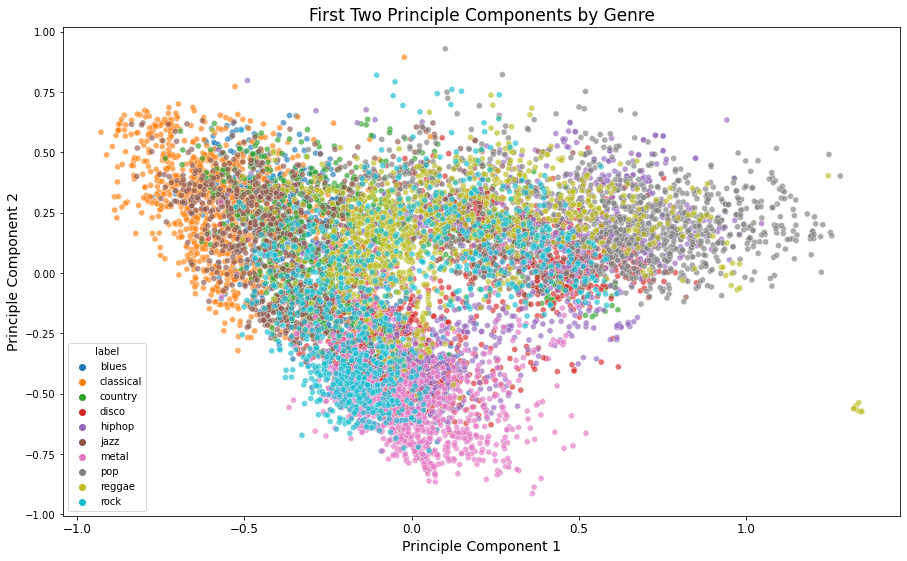

In [103]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(x = 'Principle Component 1', y = 'Principle Component 2', data = vis_df, hue = 'label', alpha = 0.65)

plt.title('First Two Principle Components by Genre', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10)
plt.xlabel('Principle Component 1', fontsize = 14)
plt.ylabel('Principle Component 2', fontsize = 14)

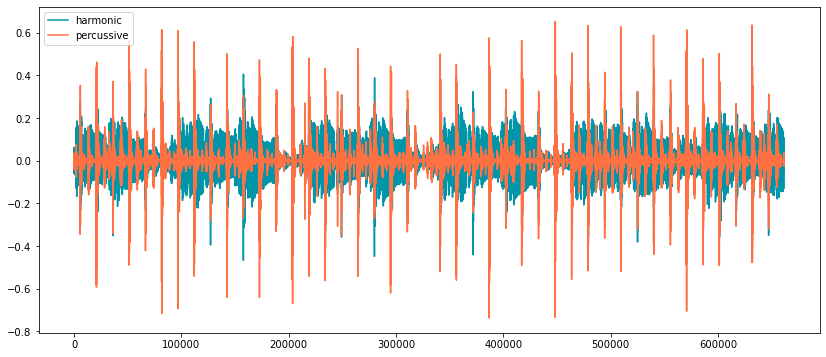

In [126]:
import librosa

audio, _ = librosa.load(f'../data/Data/genres_original/reggae/reggae.00036.wav')

audio_trimmed, _ = librosa.effects.trim(audio)

harmonic, percussive = librosa.effects.hpss(audio_trimmed)

plt.figure(figsize = (14, 6))
plt.plot(harmonic, color = '#0095A8', label='harmonic')
plt.plot(percussive, color = '#FF7043', label='percussive')
plt.legend(loc="upper left")
plt.title('First Two Principle Components by Genre', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10)
plt.xlabel('Principle Component 1', fontsize = 14)
plt.ylabel('Principle Component 2', fontsize = 14)